## Insurance Charge Analysis 
Dataset acquired from kaggle. </br>
Link: https://www.kaggle.com/datasets/mirichoi0218/insurance </br>
Please feel free to download and run on your own </br>

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For visualization
import statsmodels.api as sm # For advanced regression analytics

In [7]:
# Reading the dataset
dataset = pd.read_csv("insurance.csv")

In [8]:
# Exploring the dataset
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
dataset['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [10]:
# No nan values or na values present in the dataset 
colnames = dataset.columns
colnames

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
# dataset visualizations for each independant variable with the target as "charges"

def plot_scatter(x_var):
    sns.scatterplot(x=x_var, y="charges", data=dataset)
    plt.xlabel(x_var.capitalize())
    plt.ylabel("Charges")
    plt.title(f"Scatterplot of {x_var.capitalize()} vs Charges")
    plt.show()

In [12]:
# Transforming the categorical/Qualitative dataset 

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(dataset.sex.drop_duplicates()) 
dataset.sex = le.transform(dataset.sex)
# smoker or not
le.fit(dataset.smoker.drop_duplicates()) 
dataset.smoker = le.transform(dataset.smoker)
#region
le.fit(dataset.region.drop_duplicates()) 
dataset.region = le.transform(dataset.region)

In [13]:
dataset.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

Smoking happens to have a high impact on the insurance charges, more than 0.7, this indicates a strong positive 'Linear' relationship

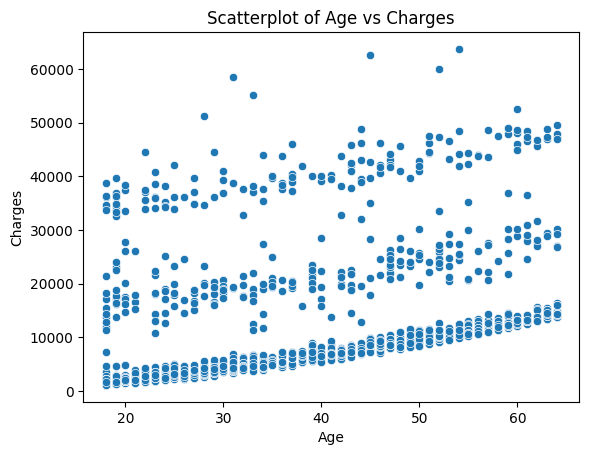

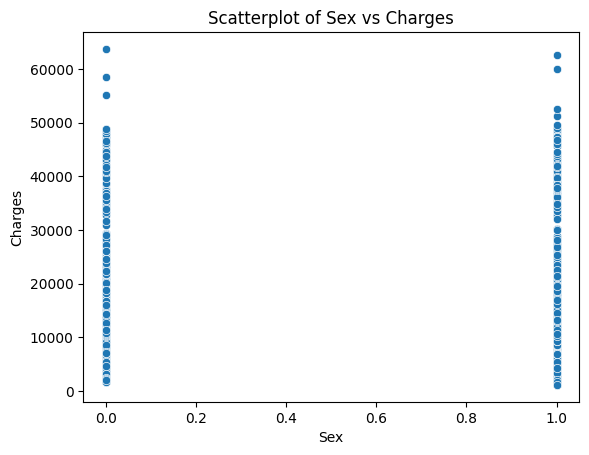

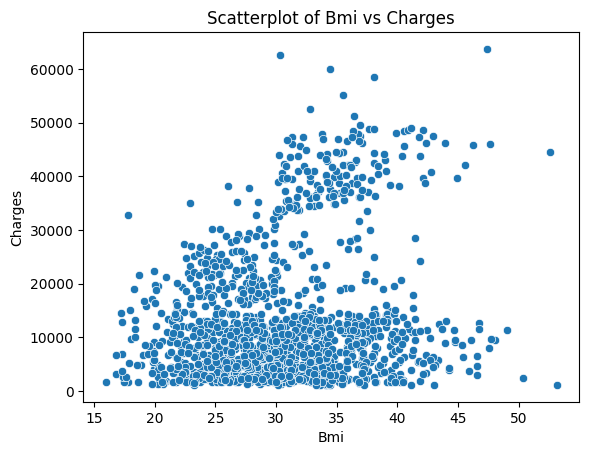

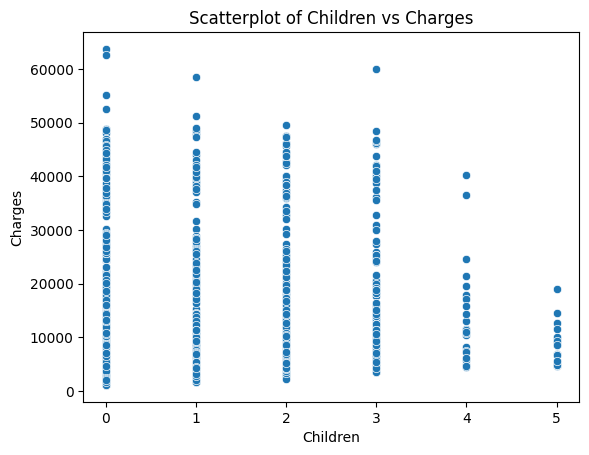

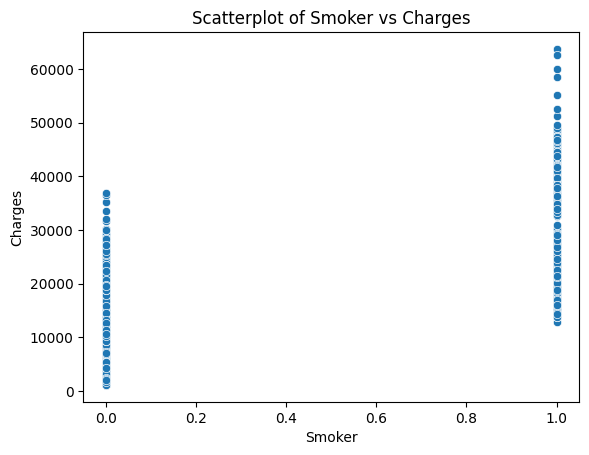

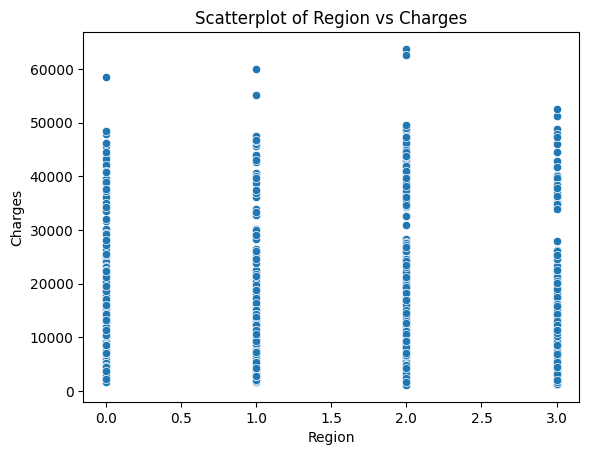

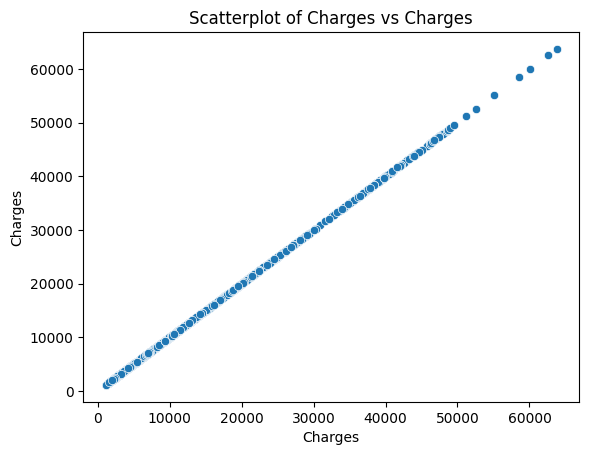

In [14]:
for colname in colnames:
    plot_scatter(colname)

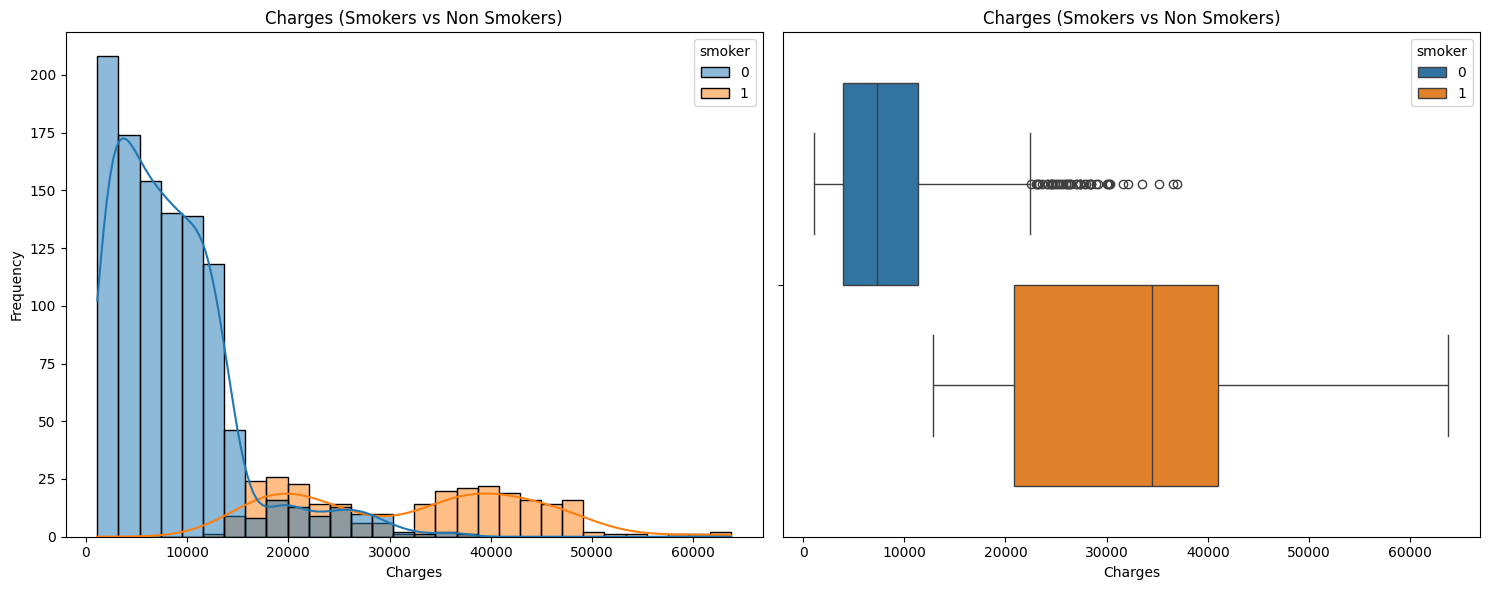

In [15]:
# Idenfying the relationship between charges vs Smokers 

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(x='charges', data=dataset, kde=True, hue='smoker', ax=ax[0])
ax[0].set_title('Charges (Smokers vs Non Smokers)')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frequency')

sns.boxplot(x='charges', data=dataset, hue='smoker', ax=ax[1])
ax[1].set_title('Charges (Smokers vs Non Smokers)')
ax[1].set_xlabel('Charges')

plt.tight_layout()

plt.show()

We can clearly see the histogram and the in the boxplot smokers in general tend to spend more non smokers. In the higher part of the histogram smokers tend to spend much on medical bills rather than non smokers, max non smoker spend on healthcare is around "40000" while smoker spends around 70000


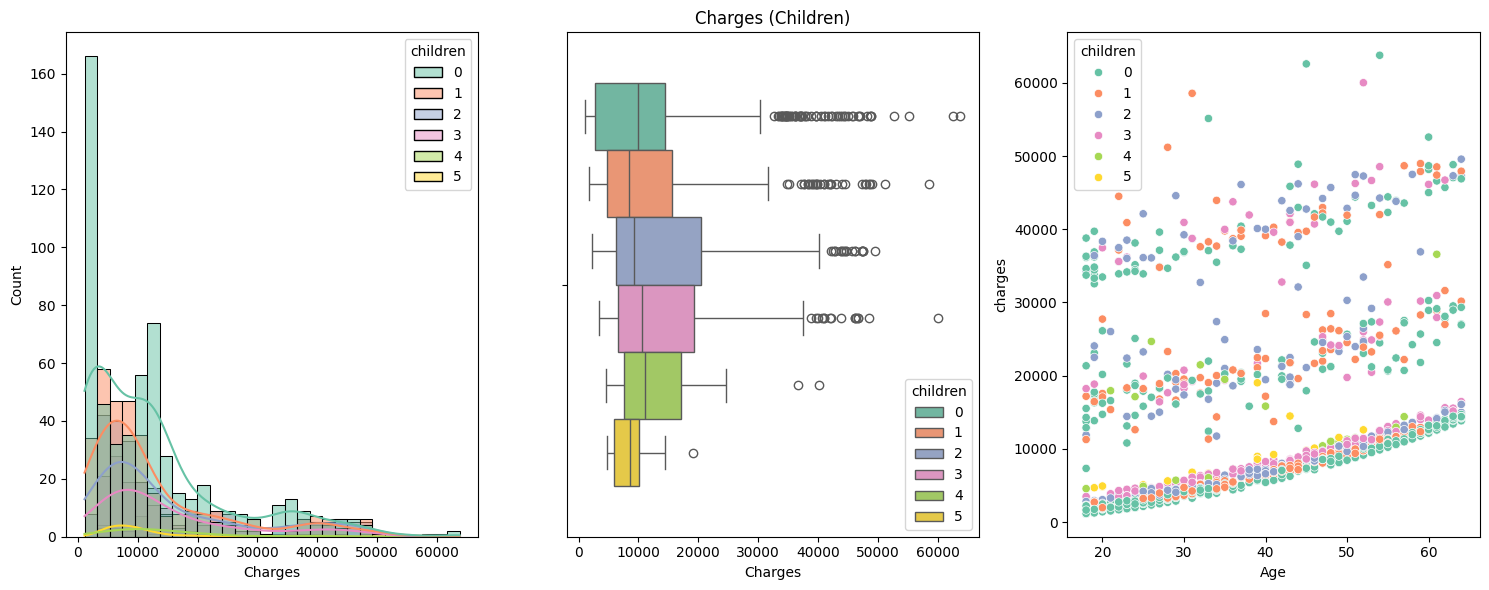

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

sns.histplot(x='charges', data=dataset, kde=True, hue='children', ax=ax[0], palette='Set2')
ax[0].set_xlabel("Charges")

sns.boxplot(x='charges', data=dataset, hue='children', ax=ax[1], palette="Set2")
ax[1].set_title("Charges (Children)")
ax[1].set_xlabel("Charges")

sns.scatterplot(data=dataset, x='age', y='charges', hue='children', ax=ax[2], palette='Set2')
ax[2].set_xlabel("Age")

plt.tight_layout()
plt.show()

People with no children tends to have lower medical costs but they are generally younger and there happens to be levels of payouts from the insurance company, after the 10000 - 25000 most of the next set of payments are in the 30000+ range rather than a uniform distribution.

In [17]:
dataset[dataset['children'] == 0]['age'].unique()

array([19, 33, 32, 31, 60, 25, 62, 23, 56, 27, 30, 18, 63, 22, 26, 24, 55,
       28, 36, 20, 40, 57, 21, 41, 45, 46, 38, 29, 37, 58, 49, 52, 59, 61,
       48, 42, 44, 39, 51, 64, 53, 54, 50, 34, 47, 43, 35])

<Axes: ylabel='Count'>

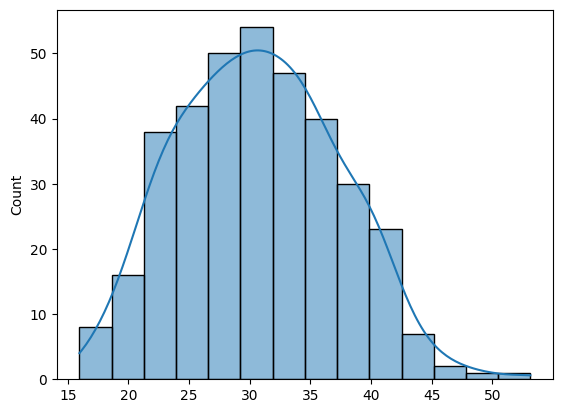

In [27]:
sns.histplot(dataset[dataset['children'] == 0]['bmi'].unique(), kde=True)

In [34]:
from ISLP.models import (ModelSpec as MS, summarize) # To get detailed Statistics about the Linear Models 

In [29]:
colnames_charges_removed = colnames.drop('charges')

In [30]:
colnames_charges_removed

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [35]:
X = MS(colnames_charges_removed).fit_transform(dataset)
y = dataset['charges']
model = sm.OLS(y, X) # Using ordinary least square method 
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-11820.0000,955.130,-12.371,0.000
age,257.2881,11.886,21.647,0.000
sex,-131.1106,332.811,-0.394,0.694
bmi,332.5701,27.722,11.997,0.000
children,479.3694,137.644,3.483,0.001
smoker,23820.0000,411.843,57.839,0.000
region,-353.6400,151.927,-2.328,0.020


Gender happens to have a high 'p' value signifining it's not satistically important and region  

In [51]:
# Droppping sex column and re doing the Linear Model
colnames_sex_region_removed = colnames_charges_removed.drop(['sex', 'region'])

In [52]:
X = MS(colnames_sex_region_removed).fit_transform(dataset)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:13:17   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
children     473.5023    137.792      3.436      0.001     203.190     743.814
smoker      2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can use this Linear model for predictions

In [45]:
from sklearn.preprocessing import StandardScaler

In [73]:
new_data = {
    'age': [30, 40],
    'bmi': [25.5, 29.0],
    'children': [1, 2],
    'smoker': [0, 1],
}

new_data = pd.DataFrame(new_data)

new_data_scaled = StandardScaler().fit_transform(new_data)

# Adding a constant term for the intercept
new_data_scaled = sm.add_constant(new_data_scaled)

# Making predictions
predictions = results.predict(new_data_scaled)

In [74]:
predictions

array([-36967.37243269,  12761.83370723])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
# Using sci-kit learn to further check the validity
predictors_sk = dataset.drop(['charges', 'sex', 'region'], axis=1) # Setting the predictor variables
target_sk = dataset['charges']

In [61]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(predictors_sk, target_sk, random_state = 0)
linear_model_sk = LinearRegression()
linear_model_sk.fit(x_train, y_train)

LinearRegression()

In [65]:
y_train_pred = linear_model_sk.predict(x_train)
y_test_pred = linear_model_sk.predict(x_test)

In [69]:
print(linear_model_sk.score(x_test, y_test))

0.7952376940081072


We can see a nearly 0.8% precision, but using a quadratic function we can increase the precision of the model

In [77]:
predictions_sk = linear_model_sk.predict(new_data)
predictions_sk

array([ 4436.00941558, 32117.20020636])

In [78]:
new_data

,age,bmi,children,smoker
0,30,25.5,1,0
1,40,29.0,2,1
